<a href="https://colab.research.google.com/github/Rahamatunnisa1121/ML-Algorithms/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #for data maipulation
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for visualization

In [ ]:
from sklearn.model_selection import train_test_split #function to split data
from sklearn.preprocessing import StandardScaler #to standardize the data
from sklearn.linear_model import LogisticRegression #importing the model
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, classification_report #Import evaluation

In [ ]:
df=pd.read_csv("diabetes.csv") #Load and read the dataset

In [ ]:
#basic info of dataset
display(df.head()) #First few rows of dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print(df.info()) #shos data types and check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [ ]:
#split data into features and target->labels
x=df.drop(columns=["Outcome"]) #All coulmnss excet outcome as features
y=df["Outcome"] #select outcome variable as target
print(x)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
#split data into training(80%) and testing(20%)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52,stratify=y) #stratify for balanced class distribution

In [ ]:
#standardize the features -> with the x_train -> making them in a specific range
scaler=StandardScaler() #creating an instance for standardscaler
x_train_scaled=scaler.fit_transform(x_train)
#fit -> calculates mean and standard deviation of the x_train
#transform ->Uses the computed values to standardize the x_train
x_test_scaled=scaler.transform(x_test) #transforming the x_test using same scalars of x_train as the test data is unseen, so no fit() call

In [ ]:
#Train the model
model=LogisticRegression() #creating and instance
model.fit(x_train_scaled,y_train) #using standardized data training the model

LogisticRegression()

In [ ]:
#predict probabilities and classes
y_pred_prob=model.predict_proba(x_test_scaled)[:,1]#predict probabilities-> a 2D array with class 0 and 1 probs
y_pred=model.predict(x_test_scaled)

In [ ]:
#calculating loss and accuracy
loss=log_loss(y_test,y_pred_prob)
accuracy=accuracy_score(y_test,y_pred)
print(f"Log loss:{loss:.4f}")
print(f"Accuracy:{accuracy:.4f}")

Log loss:0.4632
Accuracy:0.7922


In [ ]:
#Display confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:")
print(cm)
# TN FP
# FN TP

Confusion matrix:
[[90 10]
 [22 32]]


In [ ]:
#classification report
print("Classification report:")
print(classification_report(y_test,y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
#plot roc curve ->Receiver Operating Characteristic curve
from sklearn.metrics import roc_curve, auc # Import functions for ROC curve calculation
fpr,tpr,_=roc_curve(y_test,y_pred_prob) # Compute false positive and true positive rates
roc_auc=auc(fpr,tpr) #area under the roc curve


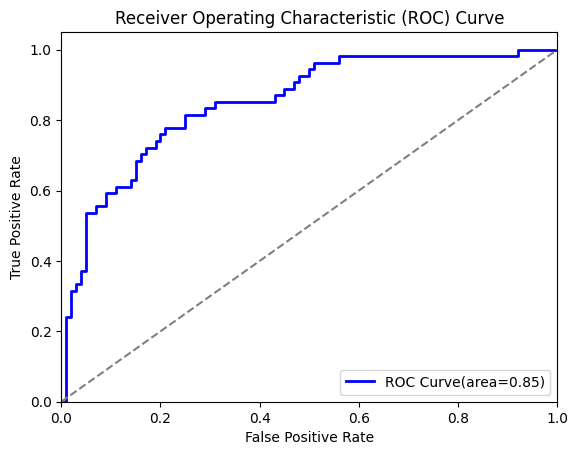

In [ ]:
plt.figure() #create a new figure
plt.plot(fpr,tpr,color='blue',lw=2,label=f'ROC Curve(area={roc_auc:.2f})') #fpr->x-axis, tpr->y-axis
plt.plot([0,1],[0,1],color='gray',linestyle='--')#plot diagnol reference
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate') #Label x-axis
plt.ylabel('True Positive Rate')  # Label y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set title
plt.legend(loc='lower right') # a key element that explains diff lines
plt.show()  # Display plot